In [1]:
from joblib import dump, load
import numpy as np

In [2]:
x_train = load('x_train_ecfp4.pkl')
x_test = load('x_test_ecfp4.pkl')
x_valid = load('x_valid_ecfp4.pkl')

In [3]:
y_train = load('y_train.pkl')
y_test = load('y_test.pkl')
y_valid = load('y_valid.pkl')

In [166]:
from sklearn.preprocessing import StandardScaler, Normalizer

In [11]:
scale = StandardScaler().fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
x_valid_scaled = scale.transform(x_valid)

In [172]:
scale_1 = Normalizer().fit(x_train)
x_train_1 = scale_1.transform(x_train)
x_test_1 = scale_1.transform(x_test)
x_valid_1 = scale_1.transform(x_valid)

In [167]:
from sklearn.decomposition import PCA

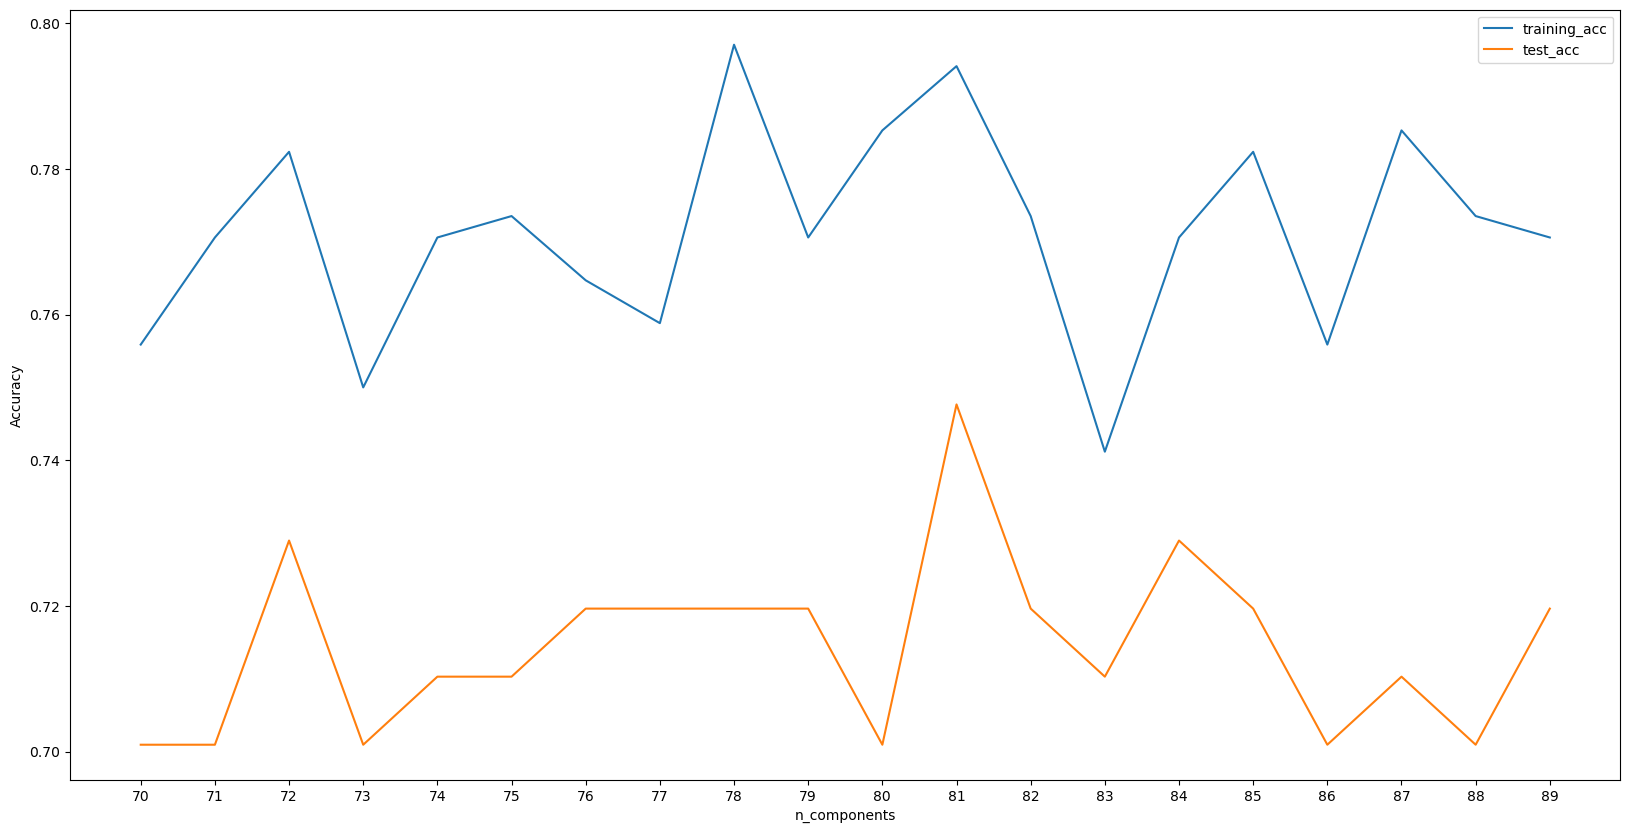

In [190]:
training_acc = []
test_acc = []

for n_components in range(70, 90, 1):
    pca = PCA(n_components=n_components, whiten=True, random_state=seed).fit(x_train_1)
    x_train_pca = pca.transform(x_train_1)
    x_test_pca = pca.transform(x_test_1)
    lr_2c8 = LogisticRegression(class_weight='balanced', random_state=seed, C=0.02, penalty='l2')
    lr_2c8.fit(x_train_pca, y_train)
    training_acc.append(cross_val_score(lr_2c8, x_train_pca, y_train, cv=cv, scoring='accuracy').mean())
    y_pred = lr_2c8.predict(x_test_pca)
    test_acc.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(20, 10))
plt.plot(range(70, 90, 1), training_acc, label="training_acc")
plt.plot(range(70, 90, 1), test_acc, label="test_acc")
plt.xlabel("n_components")
plt.ylabel("Accuracy")
xticks = np.arange(70, 90, 1)
plt.xticks(xticks)
plt.legend()

In [191]:
pca = PCA(n_components=81, whiten=True, random_state=seed).fit(x_train_1)
x_train_pca = pca.transform(x_train_1)
x_test_pca = pca.transform(x_test_1)
x_valid_pca = pca.transform(x_valid_1)

In [12]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [13]:
seed = 42

In [14]:
cv = StratifiedKFold(n_splits=10, random_state=seed)

D:\Anaconda3\envs\deepchem\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [15]:
from sklearn.linear_model import LogisticRegression

In [90]:
param_grid = {'C': [10**i for i in range(-6, 2)]}

In [91]:
lr = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=seed, penalty='l2'), param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)

In [92]:
lr.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [93]:
lr.best_params_

{'C': 1e-06}

In [94]:
lr.best_score_

0.7735294117647058

In [96]:
lr.cv_results_['mean_test_score']

array([0.77352941, 0.76176471, 0.75882353, 0.75294118, 0.76470588,
       0.76764706, 0.76764706, 0.76764706])

In [97]:
lr.cv_results_['params']

[{'C': 1e-06},
 {'C': 1e-05},
 {'C': 0.0001},
 {'C': 0.001},
 {'C': 0.01},
 {'C': 0.1},
 {'C': 1},
 {'C': 10}]

In [282]:
lr_2c8 = LogisticRegression(class_weight='balanced', random_state=seed, C=0.02, penalty='l2')

In [283]:
lr_2c8.fit(x_train_scaled, y_train)

LogisticRegression(C=0.02, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef, accuracy_score, roc_auc_score, make_scorer, recall_score

In [46]:
matthews = make_scorer(matthews_corrcoef)

In [47]:
specificity = make_scorer(recall_score, pos_label=0)

In [260]:
cross_val_score(lr_2c8, x_train_scaled, y_train, cv=cv, scoring='accuracy').mean()

0.7676470588235293

In [261]:
cross_val_score(lr_2c8, x_train_scaled, y_train, cv=cv, scoring='roc_auc').mean()

0.8540350877192981

In [262]:
cross_val_score(lr_2c8, x_train_scaled, y_train, cv=cv, scoring=matthews).mean()

0.5271703415402808

In [263]:
cross_val_score(lr_2c8, x_train_scaled, y_train, cv=cv, scoring='recall').mean()

0.8031578947368422

In [264]:
cross_val_score(lr_2c8, x_train_scaled, y_train, cv=cv, scoring=specificity).mean()

0.7176190476190476

In [246]:
y_pred = lr_2c8.predict(x_test_pca)

In [181]:
for i in y_pred:
    print(i, end=', ')

0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 

In [66]:
for i in y_test:
    print(i, end=', ')

1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 

In [247]:
accuracy_score(y_test, y_pred)

0.7476635514018691

In [248]:
roc_auc_score(y_test, lr_2c8.decision_function(x_test_pca))

0.8388765705838876

In [249]:
matthews_corrcoef(y_test, y_pred)

0.48730563008633715

In [250]:
recall_score(y_test, y_pred)

0.7424242424242424

In [251]:
recall_score(y_test, y_pred, pos_label=0)

0.7560975609756098

In [74]:
import matplotlib.pyplot as plt

0.7676470588235293 5
0.7663551401869159 0


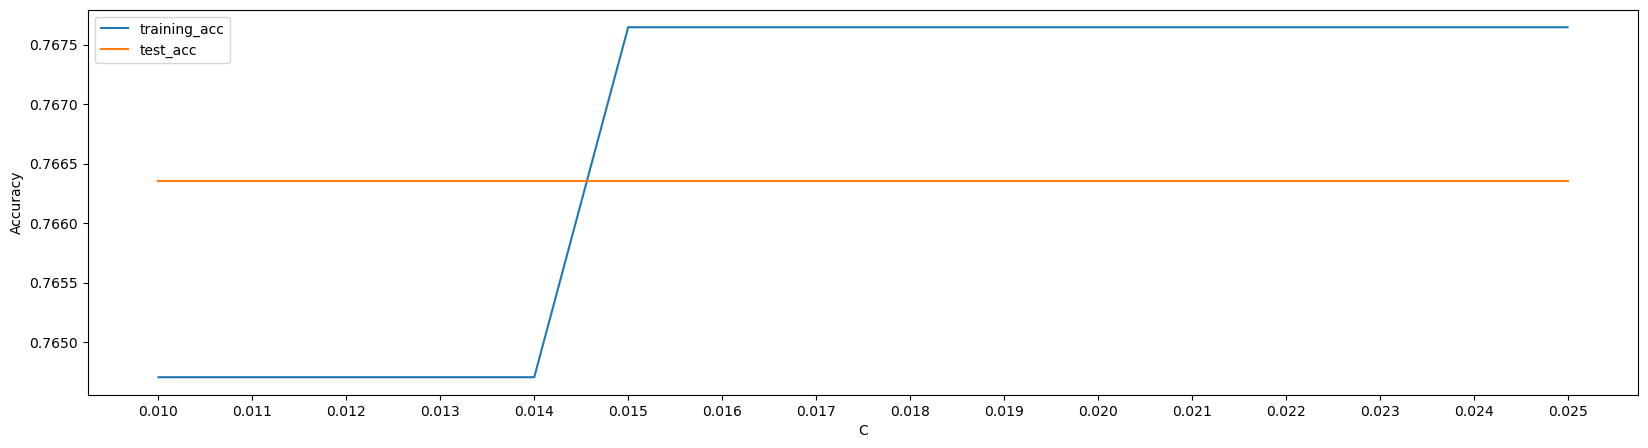

In [102]:
training_acc = []
test_acc = []

for i in np.arange(0.01, 0.026, 0.001):
    lr_2c8 = LogisticRegression(class_weight='balanced', random_state=seed, C=i, penalty='l2')
    lr_2c8.fit(x_train_scaled, y_train)
    training_acc.append(cross_val_score(lr_2c8, x_train_scaled, y_train, cv=cv, scoring='accuracy').mean())
    y_pred = lr_2c8.predict(x_test_scaled)
    test_acc.append(accuracy_score(y_test, y_pred))
print(max(training_acc),(training_acc.index(max(training_acc))))
print(max(test_acc),(test_acc.index(max(test_acc))))
plt.figure(figsize=(20, 5))
plt.plot(np.arange(0.01, 0.026, 0.001), training_acc, label="training_acc")
plt.plot(np.arange(0.01, 0.026, 0.001), test_acc, label="test_acc")
plt.xlabel("C")
plt.ylabel("Accuracy")
xticks = np.arange(0.01, 0.026, 0.001)
plt.xticks(xticks)
plt.legend()

0.8029411764705883 66
0.7476635514018691 0


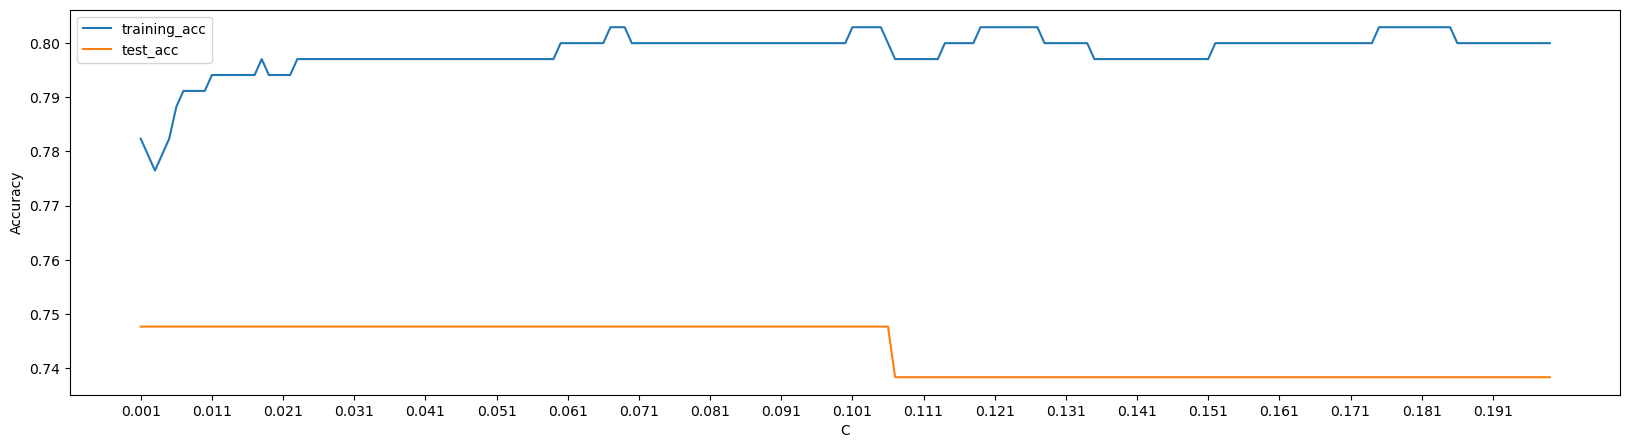

In [238]:
training_acc = []
test_acc = []

for i in np.arange(0.001, 0.2, 0.001):
    lr_2c8 = LogisticRegression(class_weight='balanced', random_state=seed, C=i, penalty='l2')
    lr_2c8.fit(x_train_pca, y_train)
    training_acc.append(cross_val_score(lr_2c8, x_train_pca, y_train, cv=cv, scoring='accuracy').mean())
    y_pred = lr_2c8.predict(x_test_pca)
    test_acc.append(accuracy_score(y_test, y_pred))
print(max(training_acc),(training_acc.index(max(training_acc))))
print(max(test_acc),(test_acc.index(max(test_acc))))
plt.figure(figsize=(20, 5))
plt.plot(np.arange(0.001, 0.2, 0.001), training_acc, label="training_acc")
plt.plot(np.arange(0.001, 0.2, 0.001), test_acc, label="test_acc")
plt.xlabel("C")
plt.ylabel("Accuracy")
xticks = np.arange(0.001, 0.2, 0.01)
plt.xticks(xticks)
plt.legend()

In [265]:
y_pred_valid = lr_2c8.predict(x_valid_scaled)

In [266]:
accuracy_score(y_valid, y_pred_valid)

0.7790697674418605

In [267]:
roc_auc_score(y_valid, lr_2c8.decision_function(x_valid_scaled))

0.9105291871249318

In [268]:
matthews_corrcoef(y_valid, y_pred_valid)

0.5527340609286592

In [269]:
recall_score(y_valid, y_pred_valid)

0.8297872340425532

In [270]:
recall_score(y_valid, y_pred_valid, pos_label=0)

0.717948717948718

In [274]:
dump(lr_2c8, '2c8_ecfp4_lr.pkl', compress=3)

['2c8_ecfp4_lr.pkl']